In [166]:
import sys

PWD = '../..'
sys.path.append(PWD)

DATASET_PATH = PWD + '/data/dataset/dataset.pkl'
IMAGES_DIR = PWD + '/data/tmp/cfd_visualisation/'

import pickle

import numpy as np
from matplotlib import pyplot as plt

In [45]:
with open(DATASET_PATH, 'rb') as file:
    dataset = pickle.load(file)

In [46]:
N_BASELINE = 6

## Utils

In [153]:
x_time = np.arange(0, 24 / 7.695, 1 / 7.695)

def show_waveform(waveform, init=True, legend=False, **kwargs):
    if init:
        plt.figure(figsize=(6, 4))
        plt.rc('font', size=9)
    plt.plot(x_time, waveform, marker='.', linewidth=1, markersize=5, **kwargs)
    if init:
        plt.ylim(-0.05, 1.05)
        plt.xlabel('time [ns]')
        plt.ylabel('voltage [V]')
        plt.grid()
    if legend:
        plt.legend()

## Step 0. Visualise

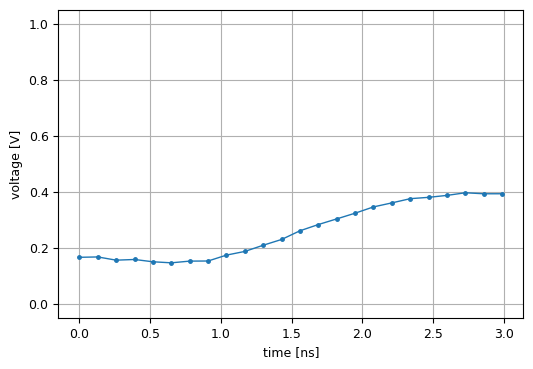

In [133]:
waveform = dataset[(2, 11)][0][500]

show_waveform(waveform)
plt.show()

## Step 1. Baseline subtraction

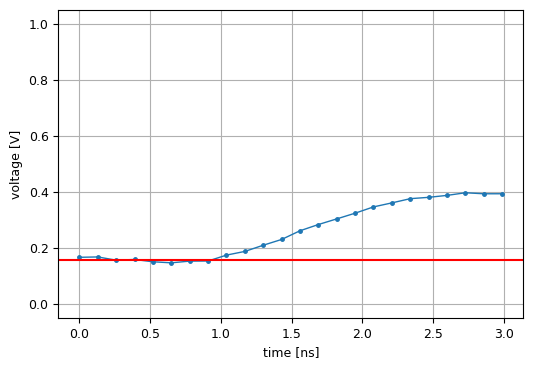

In [134]:
baseline = np.mean(waveform[:N_BASELINE])

show_waveform(waveform)
plt.axhline(baseline, c='red')
plt.show()

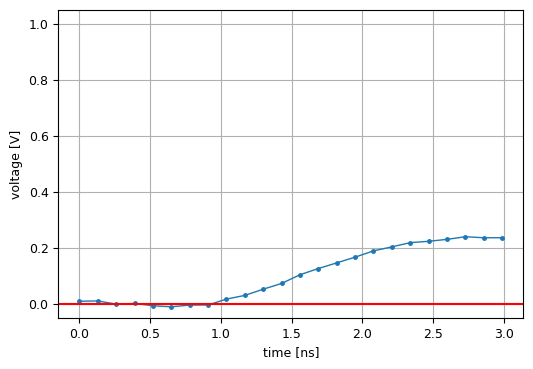

In [135]:
waveform_baseline = waveform - baseline

show_waveform(waveform_baseline)
plt.axhline(0, c='red')
plt.show()

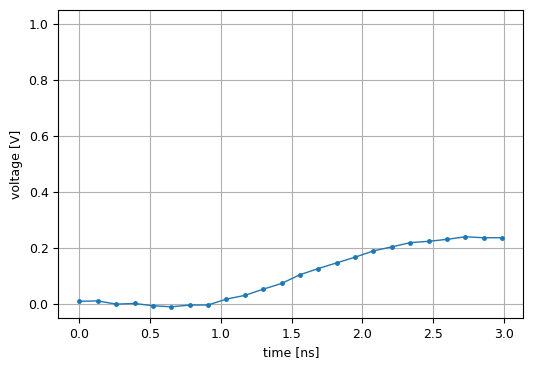

In [136]:
waveform_baseline = waveform - baseline

show_waveform(waveform_baseline)
plt.show()

## Step 2. Normalisation

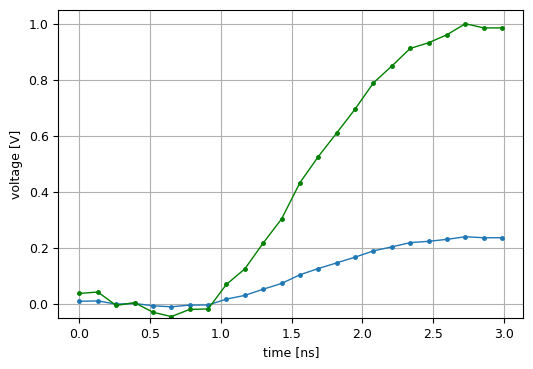

In [137]:
waveform_norm = waveform_baseline / np.max(waveform_baseline)

show_waveform(waveform_baseline)
show_waveform(waveform_norm, init=False, c='green')
plt.show()

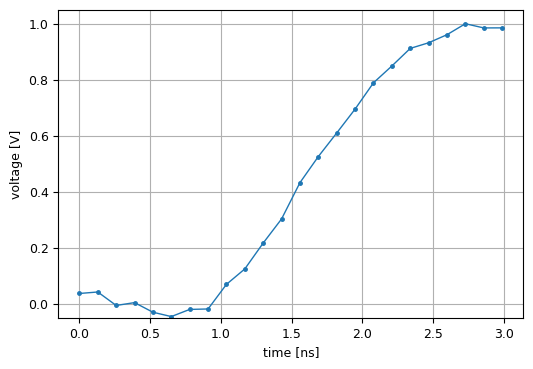

In [138]:
show_waveform(waveform_norm)

## Step 3. Fixed threshold

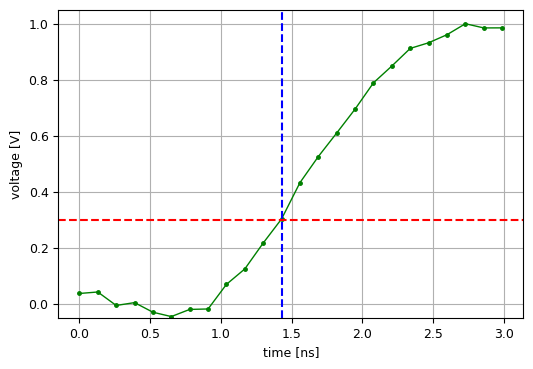

In [223]:
show_waveform(waveform_norm, c='green')

plt.axhline(0.3, c='red', linestyle='--')
plt.axvline(1.43, c='blue', linestyle='--')

plt.savefig(IMAGES_DIR + 'cfd.pdf')
plt.show()

## Together

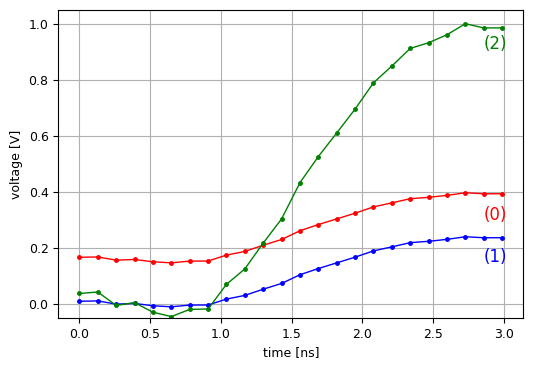

In [224]:
show_waveform(waveform, init=True, c='red', label='default')
show_waveform(waveform_baseline, init=False, c='blue', label='baseline subtracted')
show_waveform(waveform_norm, init=False, legend=False, c='green', label='normalised')

plt.text(2.86, 0.3, '(0)', c='red', fontsize=12)
plt.text(2.86, 0.15, '(1)', c='blue', fontsize=12)
plt.text(2.86, 0.91, '(2)', c='green', fontsize=12)

plt.savefig(IMAGES_DIR + 'together.pdf')
plt.show()

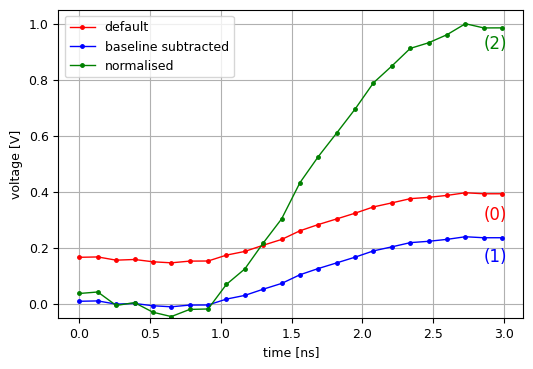

In [225]:
show_waveform(waveform, init=True, c='red', label='default')
show_waveform(waveform_baseline, init=False, c='blue', label='baseline subtracted')
show_waveform(waveform_norm, init=False, legend=True, c='green', label='normalised')

plt.text(2.86, 0.3, '(0)', c='red', fontsize=12)
plt.text(2.86, 0.15, '(1)', c='blue', fontsize=12)
plt.text(2.86, 0.91, '(2)', c='green', fontsize=12)

plt.savefig(IMAGES_DIR + 'together_legend.pdf')
plt.show()